# Spectrogram Proof of Concept
Make sure we understand what specgram() does

## Summary
[specgram() documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.specgram.html)

### time series parameters and input to specgram()
n = len( signal in time domain)<br />
dt = deta time. I.E. the amount of time between samples <br/>
fs = sampling freq = 1/dt Hz <br />
nfft = the window length used to calculate FFT. Should be a power of 2 <br />
noverlap = number of sample window overlap. Typically want 50% overlap. I.e nfft/2 <br />


### specgram() output
pxx = the segments x freqs array of instantaneous power <br/>
freqs = the frequency vector <br/>
bins = the centers of the time bins in which the power is computed <br/>
im is the matplotlib.image.AxesImage instance

### Example
n: 10000  fs: 500  nfft: 128  noverlap: 64 <br/>
signal.shape = (1,n) = real numbers in time domain

pxx, freqs, bins, im = specgram(signal, nfft, fs, noverlap) <br />

pxx.shape (65, 155)  rows*cols: 10075 <br/>
freqs.shape: (65,) <br/>
num_windows: 155 <br/>
num_freq = nfft / 2 + 1

$ number \:of \:windows\: =\: \left\lfloor \frac { n\quad -\quad nfft }{ noverlap }  \right\rfloor \: +\: 1 $

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Explore matplotlib  specgram() demo
[matplotlib.pyplot.specgram demo](https://matplotlib.org/gallery/images_contours_and_fields/specgram_demo.html#sphx-glr-gallery-images-contours-and-fields-specgram-demo-py)

In [2]:
# create sample signals.
# s1 amplitude 1, freq of 100, phase = 0
# s2 amplitude 2, freq of 200, phase = 0 
dt = 0.002 # delta time
t = np.arange(0.0, 20.0, dt)
s1 = 1 * np.sin(np.pi * 100 * t)
s2 = 2 * np.sin(np.pi * 200 * t)

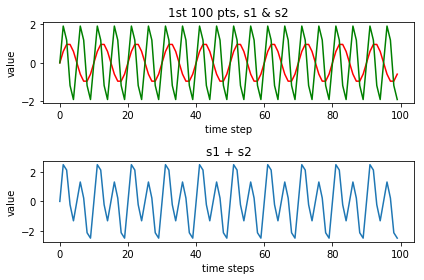

In [3]:
def timeDomainPlots(s1, s2) :
    '''
    creates 2 subplots of using the first 100 samples. The first plot
    shows the two signals. The second plot shows s1 + s2
    '''
    
    fig = plt.figure() 
    
    # Note that using plt.subplots below is equivalent to using
    # fig = plt.figure() and then ax = fig.add_subplot(111)
    # fig, ax1 = plt.subplots()
    plt.subplot(2, 1, 1) # nrow, ncol, place in grid
    plt.plot(s1[0:100], 'r')
    plt.plot(s2[0:100], 'g') 
    plt.xlabel("time step")
    plt.ylabel("value")
    plt.title("1st 100 pts, s1 & s2")

    plt.subplot(2,1,2) # nrow, ncol, place in grid
    plt.plot(s1[0:100] + s2[0:100]) 
    plt.xlabel("time steps")
    plt.ylabel("value")
    plt.title("s1 + s2")

    plt.tight_layout() # adjust so that labels do not over lap

    plt.show()
    
timeDomainPlots(s1, s2)

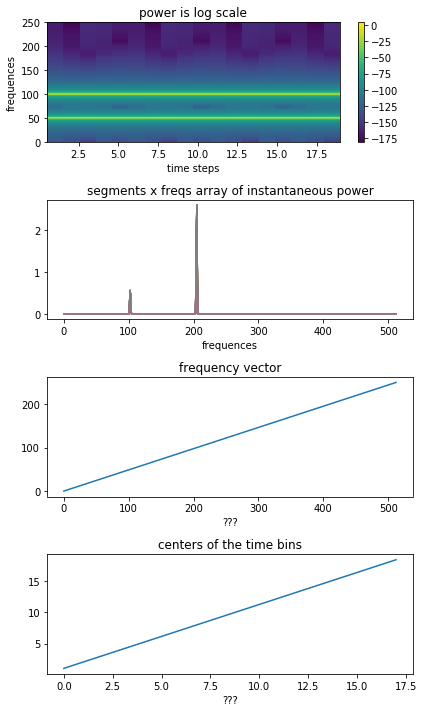

fs: 500Hz max freq: fs/2
pxx.shape (513, 18)
num windows (len(t) - NFFT)/noverlap =  17.53125


In [4]:
def spectorGramPlots(dt, s1, s2):
    '''
    calls specgram(s1 + s2)
    
    arguments:
    dt = delta time. I.e. amount of time between samples
    s1 = time series for first signal
    s2 = time series for second signal
    '''
    fig = plt.figure(figsize=(6,10))

    # NFFT is length of windowing segement
    # we should only use windowing if we either have a lot of data
    # or are running a continuous DFT. For best preformance NFFT
    # should be a power of 2
    #
    # noverlap is the number of points of overlap between blocks 
    # typically you use 50%. I.E. half the samples are from the 
    # previous window. For best performance noverlap should be a
    # power of two
    NFFT = 1024 # len(s1) we get a warning if we only have one window
    noverlap = int(NFFT / 2)  #900
    Fs = int(1.0 / dt)  # the sampling frequency

    grid = 411 # nrow, ncol, place in grid
    plt.subplot(grid) 


    # pxx is the segments x freqs array of instantaneous power,
    # freqs is the frequency vector,
    # bins are the centers of the time bins in which the power is 
    #      computed,
    # im is the matplotlib.image.AxesImage instance
    pxx, freqs, bins, im = plt.specgram(s1 + s2, NFFT=NFFT, Fs=Fs, 
                                        noverlap=noverlap, 
#                                         scale='linear'
                                       )
    
    plt.xlabel("time steps")
    plt.ylabel("frequences")
    plt.title("power is log scale")
    fig.colorbar(im)
    
    grid += 1
    plt.subplot(grid) # nrow, ncol, place in grid
    plt.plot(pxx)
    plt.xlabel("frequences")
    plt.title("segments x freqs array of instantaneous power")

    grid += 1
    plt.subplot(grid) # nrow, ncol, place in grid
    plt.plot(freqs)
    plt.xlabel("???")
    plt.title("frequency vector")
 
    grid += 1
    plt.subplot(grid) # nrow, ncol, place in grid
    plt.plot(bins)
    plt.xlabel("???")
    plt.title("centers of the time bins")

    plt.tight_layout() # adjust so that labels do not over lap

    plt.show()
    
    print("fs: {}Hz max freq: fs/2".format(Fs))
    print("pxx.shape", pxx.shape)
    print("num windows (len(t) - NFFT)/noverlap = ", 
          (len(t) - NFFT)/noverlap)

spectorGramPlots(dt, s1, s2)    

## Reverse engineer specgram() using simple sin waves

n 10000


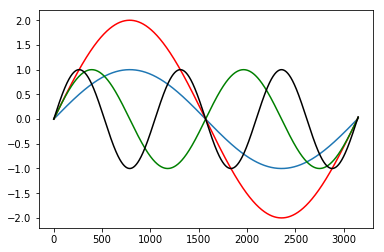

In [5]:
dt = 0.002 # delta time
t = np.arange(0.0, 20.0, dt)
fs = int(1.0 / dt)  # the sampling frequency
n = len(t)
print("n", n)

sin_x = np.sin(t)
sin_2x = sin_x * 2
sin_f2x = np.sin(t * 2)
sin_f3x = np.sin(t * 3)
sin_f100x = np.sin(t * 100)

range=3150
plt.plot(sin_x[0:range])
plt.plot(sin_2x[0:range], 'r')
plt.plot(sin_f2x[0:range], 'g')
plt.plot(sin_f3x[0:range], 'k') # black
plt.show()

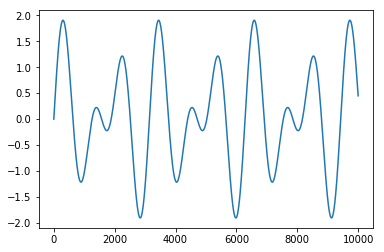

In [6]:
plt.plot(sin_f2x + sin_f3x)

In [7]:
def graph_spectrogram(data, nfft=256, fs=8000, noverlap=128,
                     title=''):
    '''
    Calculate and plot spectrogram for a wav audio file
    
    arguments
        nfft     = The number of data points used in each block for the 
                    FFT. A power 2 is most efficient. I.E. the Length of 
                    each window segment
        fs       = 8000 # Sampling frequencies
        fs       = The sampling frequency (samples per time unit). It is
                    used to calculate the Fourier frequencies, freqs, 
                    in cycles per time unit. The default value is ???.
        noverlap = The number of points of overlap between blocks. 
                    The default value is 128.
        title    = string title
        
    return ppx
    '''
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel('time steps')
    ax.set_ylabel('frequence')
    
# Pxx is the segments x freqs array of instantaneous power,
# freqs is the frequency vector,
# bins are the centers of the time bins in which the power is computed,
# im is the matplotlib.image.AxesImage instance

#                                         scale='linear',    
    pxx, freqs, bins, im = plt.specgram(data, nfft, fs, 
#                                         scale='linear',     
#                                         scale_by_freq=True,
                                        noverlap = noverlap)
    fig.colorbar(im).set_label('Intensity [scale?]')
    
    print("n:", len(data), " fs:", fs, " nfft:", nfft, " noverlap:", noverlap)
    pxx_shape = pxx.shape
    print("pxx.shape", pxx_shape, \
          " rows*cols:", pxx_shape[0] * pxx_shape[1] )
    print("freqs.shape:",freqs.shape)
#     print("freqs\n", freqs)
    nwindows = np.floor( (len(data) - nfft) / noverlap ) + 1
    print("num_windows:", nwindows)
    
    return pxx

n: 10000  fs: 500  nfft: 5000  noverlap: 2500
pxx.shape (2501, 3)  rows*cols: 7503
freqs.shape: (2501,)
num_windows: 3.0


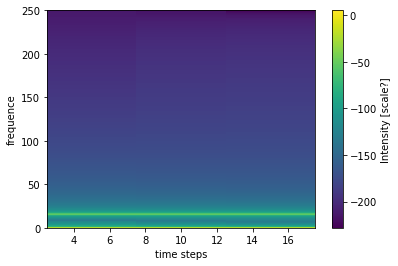

In [8]:
# fs = 2 * np.pi / size # sample freq 
nfft = int(n / 2) # window length
#nfft = 128
noverlap = int(nfft / 2) # 50% of samples are from previous window
pxx = graph_spectrogram(sin_f2x + sin_f100x, nfft=nfft, fs=fs, 
                        noverlap=noverlap)

In [9]:
# ppx.shape is (freq/2 +1, numWindows)
# n: 10000  fs: 500  nfft: 5000  noverlap: 2500
# pxx.shape (2501, 3)  rows*cols: 7503
# freqs.shape: (2501,)
# num_windows: 3.0

# n: 10000  fs: 500  nfft: 128  noverlap: 64
# pxx.shape (65, 155)  rows*cols: 10075
# freqs.shape: (65,)
# num_windows: 155.0